In [3]:
import json
import pandas as pd

# Path to your JSON file
file_path = 'data_with_titel_embedding.json'

# Open the JSON file and load its content
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert the JSON data into a DataFrame
df = pd.DataFrame(data)





In [7]:
len(df['combined_embedding'][123])

768

In [ ]:
df.drop(subset=['views',''])

In [11]:
# Select necessary columns for clustering
clustering_df = df[['video_id', 'tags', 'category','category_id', 'combined_embedding']]

clustering_df


,video_id,tags,category,category_id,combined_embedding
0,RswkyHO6zkM,g n n k b l e v c e r e n n c e r n k b l e c ...,Film & Animation,1,"[-0.8094359636, -0.4726789594, -0.2782412767, ..."
1,0ZgwrIlBf2U,r l e r f u l l v e r l e r n e w r l e r r l ...,Film & Animation,1,"[-0.9190508723, -0.6291724443, -0.8364736438, ..."
2,rF4y8Z10-PI,h e e q u l z e r h e e q u l z e r c e n e h ...,Film & Animation,1,"[-0.8471205831, -0.5587693453, -0.5335170031, ..."
3,UrRZ-kKnBEw,h e p r n c e b r e r c l e x b l l c r l,Film & Animation,1,"[-0.8086147308, -0.4953981936, -0.9000739455, ..."
4,jc0ZcR8ozjE,n ı k k k u u n ı k k k u u z ö z g e ö z p r ...,Film & Animation,1,"[-0.8515130877, -0.4386580586, -0.6855377555, ..."
...,...,...,...,...,...
7723,s5UarLR8SmE,h e l h l r e c p e h e l h l r e c p e f r w ...,Education,27,"[-0.7333920002, -0.4133580029, -0.2094023079, ..."
7724,M7pMtxicaVU,l u n c h r e c p e n n l u n c h r e c p e f ...,Education,27,"[-0.7407260537, -0.4115942121, -0.5249691606, ..."
7725,28Du9nIQwBM,k n c r e l u n n u r l k n c r e k n c r e h ...,Education,27,"[-0.7899497151, -0.3439107537, -0.3350068927, ..."
7726,Ecc7SHqymPo,r e u c b l e l n e r f f e r e n l e q u n f ...,Education,27,"[-0.777256906, -0.5230876207, -0.9335253239, 0..."


In [9]:
# Save the DataFrame to a CSV file
clustering_df.to_csv('clustering_data.csv', index=False)



In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example: Check similarity between two videos
embedding_1 = np.array(clustering_df['combined_embedding'].iloc[3453])
embedding_2 = np.array(clustering_df['combined_embedding'].iloc[345])

similarity = cosine_similarity([embedding_1], [embedding_2])[0][0]
print(f"Cosine Similarity: {similarity}")


Cosine Similarity: 0.9746652529555475


In [20]:
from sklearn.cluster import KMeans

# Extract embeddings
embeddings = np.vstack(clustering_df['combined_embedding'])

# Perform clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clustering_df['cluster'] = kmeans.fit_predict(embeddings)

# Analyze clusters
print(clustering_df[['video_id', 'category', 'cluster']])


c:\Users\Bhupesh\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         video_id          category  cluster
0     RswkyHO6zkM  Film & Animation        2
1     0ZgwrIlBf2U  Film & Animation        4
2     rF4y8Z10-PI  Film & Animation        0
3     UrRZ-kKnBEw  Film & Animation        4
4     jc0ZcR8ozjE  Film & Animation        3
...           ...               ...      ...
7723  s5UarLR8SmE         Education        2
7724  M7pMtxicaVU         Education        0
7725  28Du9nIQwBM         Education        2
7726  Ecc7SHqymPo         Education        1
7727  jyD3uKKxI0g         Education        4

[7728 rows x 3 columns]


C:\Users\Bhupesh\AppData\Local\Temp\ipykernel_24144\3234095069.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['cluster'] = kmeans.fit_predict(embeddings)


c:\Users\Bhupesh\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bhupesh\AppData\Local\Temp\ipykernel_24144\4253527908.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['cluster'] = kmeans.fit_predict(embeddings)


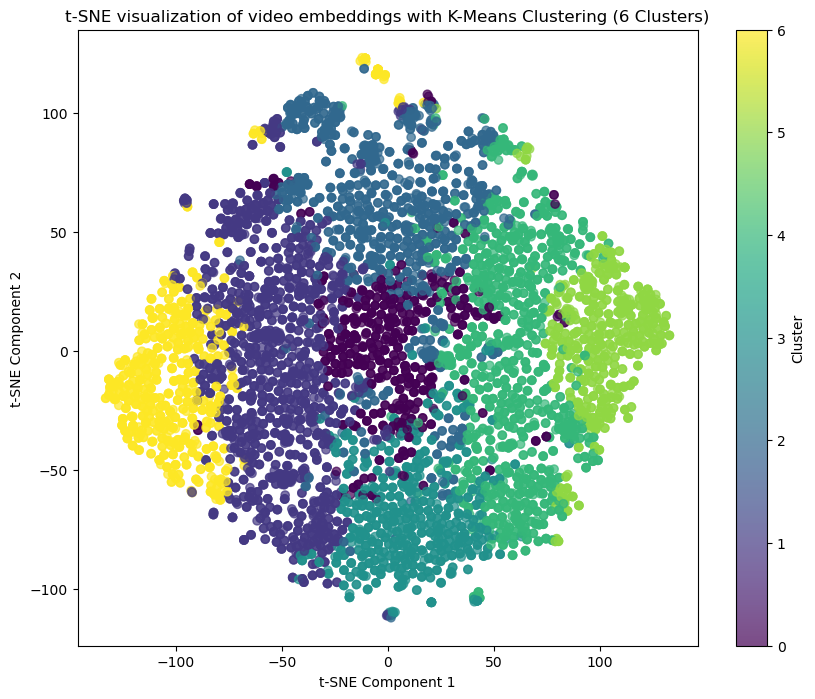

      video_id          category  cluster
0  RswkyHO6zkM  Film & Animation        4
1  0ZgwrIlBf2U  Film & Animation        6
2  rF4y8Z10-PI  Film & Animation        4
3  UrRZ-kKnBEw  Film & Animation        6
4  jc0ZcR8ozjE  Film & Animation        3


In [27]:
from sklearn.cluster import KMeans

# Set number of clusters to 6
optimal_k = 7

# Perform K-Means clustering with 6 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clustering_df['cluster'] = kmeans.fit_predict(embeddings)

# Visualize the clusters using t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot the 2D representation of the embeddings with clusters
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clustering_df['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('t-SNE visualization of video embeddings with K-Means Clustering (6 Clusters)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Optionally, print the clusters and associated video IDs
print(clustering_df[['video_id', 'category', 'cluster']].head())


In [33]:
clustering_df['cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0       4
1       6
2       4
3       6
4       3
       ..
7723    5
7724    4
7725    5
7726    1
7727    6
Name: cluster, Length: 7728, dtype: int32>

c:\Users\Bhupesh\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bhupesh\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bhupesh\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bhupesh\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bhupesh\Anaconda3\Lib\site-packages\skl

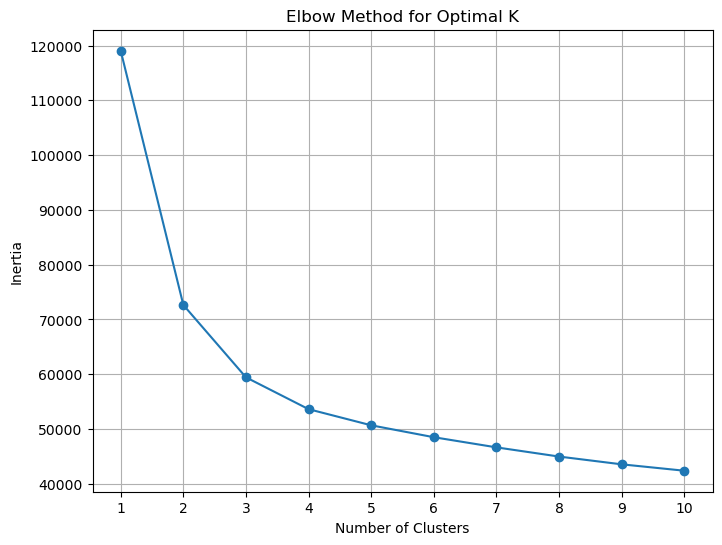

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of cluster numbers to test
cluster_range = range(1, 11)

# Store inertia values for each cluster count
inertia = []

# Loop through different numbers of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


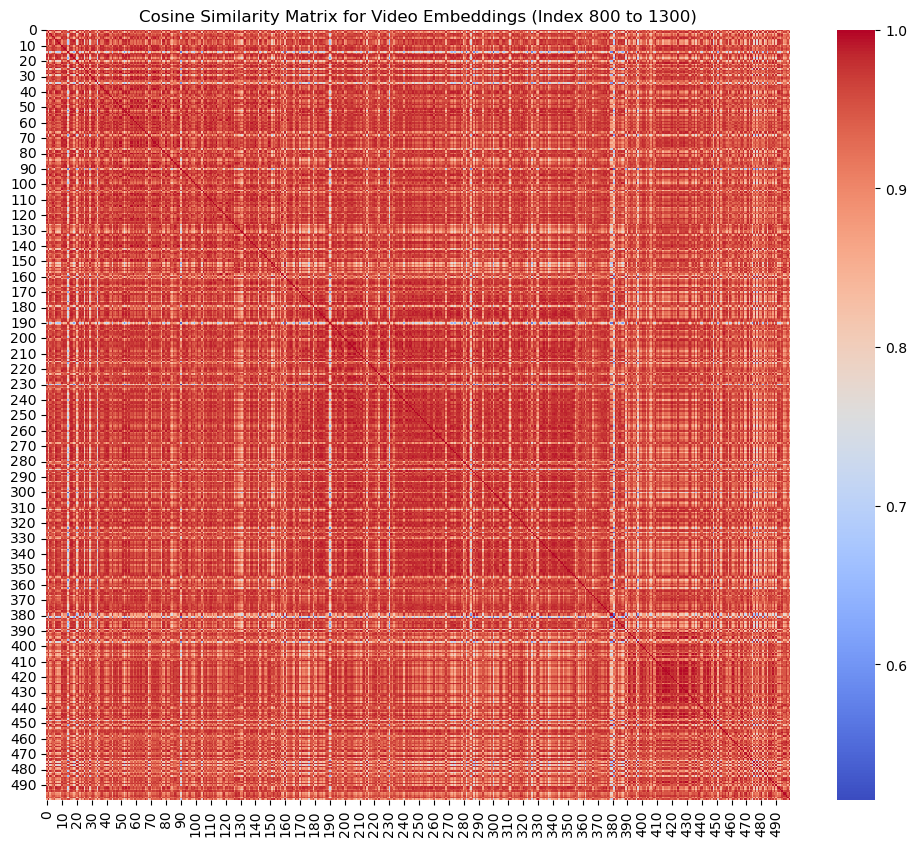

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Slice the embeddings for the range 800 to 1300
subset_embeddings = np.vstack(clustering_df['combined_embedding'].iloc[800:1300])

# Compute cosine similarity matrix for the subset
cos_sim_matrix_subset = cosine_similarity(subset_embeddings)

# Plot the heatmap for the cosine similarity matrix of the subset
plt.figure(figsize=(12, 10))
sns.heatmap(cos_sim_matrix_subset, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Cosine Similarity Matrix for Video Embeddings (Index 800 to 1300)')
plt.show()


In [34]:
df[df['video_id']=='RswkyHO6zkM']

,video_id,title,description,category_id,views,likes,like_to_view_ratio,comment_count,tags,published_at,channel_title,channel_id,video_url,category,transcript,transcript_features,combined_text,combined_embedding
0,RswkyHO6zkM,skibidi toilet zombie universe delete man,social media second channel monsteruplive disc...,1,2117501,76455.0,0.0361,4416.0,g n n k b l e v c e r e n n c e r n k b l e c ...,2024-11-16T15:00:06Z,MonsterUP,UCSKtuoTEJ-1WS-ZUzfx_SIw,https://www.youtube.com/watch?v=RswkyHO6zkM,Film & Animation,deceive want help force weak one plunger remai...,"[0.1507556723, 0.1507556723, 0.1507556723, 0.1...",skibidi toilet zombie universe delete man soci...,"[-0.8094359636, -0.4726789594, -0.2782412767, ..."


In [36]:
df['video_id'].duplicated().sum()

4446